In [1]:
# Gerekli kütüphaneleri yüklüyorum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarlarını yapıyorum
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Veriyi yüklüyorum
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# İlk 5 satıra bakalım
df.head()

# Veri seti boyutu için
print(f"Veri Seti Boyutu: {df.shape}")
print(f"Satır Sayısı: {df.shape[0]}")
print(f"Sütun Sayısı: {df.shape[1]}")

# Sütun isimleri ve tipleri
df.info()

# İstatistiksel özet
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
import os

# Şu anki çalışma dizinini göster
print("Şu anki çalışma dizini:")
print(os.getcwd())

# Bu dizindeki dosyaları listele
print("\nBu dizindeki dosyalar:")
for file in os.listdir():
    print(file)

Şu anki çalışma dizini:
D:\telco-churn-project

Bu dizindeki dosyalar:
.ipynb_checkpoints
01_eda.ipynb
data
venv


In [4]:
# Veriyi data klasöründen yükle
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Başarılı mı kontrol et
print("✅ Veri başarıyla yüklendi!")
print(f"Veri seti boyutu: {df.shape}")
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")

# İlk 5 satıra bakalım
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [7]:
import os

# data/raw klasöründeki dosyaları listele
print("data/raw klasöründeki dosyalar:")
for file in os.listdir('data/raw'):
    print(f"  - {file}")

data/raw klasöründeki dosyalar:
  - Telco_customer_churn.xlsx


In [8]:
# Excel dosyasını yükle
df = pd.read_excel('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

# veya dosya ismini kontrol ettikten sonra doğru isimle:
# df = pd.read_excel('data/raw/dosya_ismi.xlsx')

print("✅ Veri başarıyla yüklendi!")
print(f"Boyut: {df.shape[0]} satır, {df.shape[1]} sütun")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/WA_Fn-UseC_-Telco-Customer-Churn.xlsx'

In [9]:
# Excel dosyalarını okumak için openpyxl gerekli
# Terminal veya Jupyter'da çalıştırın:
!pip install openpyxl

# Sonra tekrar deneyin:
df = pd.read_excel('data/raw/WA_Fn-UseC_-Telco-Customer-Churn.xlsx', engine='openpyxl')


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpy

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/WA_Fn-UseC_-Telco-Customer-Churn.xlsx'

In [10]:
import pandas as pd
import os

def find_and_load_data():
    """
    Telco Customer Churn datasını bulup yükler
    """
    
    # Olası dosya konumları
    possible_paths = [
        'data/raw/*.xlsx',
        'data/raw/*.xls',
        'data/raw/*.csv',
        'data/*.xlsx',
        'data/*.xls',
        'data/*.csv',
        '*.xlsx',
        '*.xls',
        '*.csv'
    ]
    
    print("🔍 Dosya aranıyor...\n")
    
    # Tüm olası yerlerde ara
    for pattern in possible_paths:
        directory = os.path.dirname(pattern) or '.'
        extension = os.path.basename(pattern)
        
        if os.path.exists(directory):
            files = os.listdir(directory)
            
            for file in files:
                file_lower = file.lower()
                
                # Telco veya churn içeren dosyaları bul
                if ('telco' in file_lower or 'churn' in file_lower) and \
                   (file_lower.endswith('.xlsx') or file_lower.endswith('.xls') or file_lower.endswith('.csv')):
                    
                    full_path = os.path.join(directory, file)
                    print(f"✅ Dosya bulundu: {full_path}")
                    print(f"   Boyut: {os.path.getsize(full_path) / 1024:.2f} KB")
                    
                    try:
                        # Excel mi CSV mi kontrol et
                        if file_lower.endswith('.csv'):
                            df = pd.read_csv(full_path)
                        else:
                            df = pd.read_excel(full_path, engine='openpyxl')
                        
                        print(f"   ✅ Yüklendi: {df.shape[0]} satır, {df.shape[1]} sütun\n")
                        return df, full_path
                        
                    except Exception as e:
                        print(f"   ❌ Yükleme hatası: {e}\n")
                        continue
    
    print("❌ Uygun dosya bulunamadı!")
    return None, None

# Dosyayı bul ve yükle
df, file_path = find_and_load_data()

if df is not None:
    print("="*50)
    print("📊 VERİ SETİ BİLGİLERİ")
    print("="*50)
    print(f"Dosya: {file_path}")
    print(f"Boyut: {df.shape[0]} satır × {df.shape[1]} sütun")
    print(f"\nİlk 3 satır:")
    display(df.head(3))
else:
    print("\n⚠️ Manuel olarak dosya yolunu belirtmeniz gerekiyor.")
    print("Lütfen aşağıdaki komutu çalıştırarak dosyayı bulun:")
    print("\nimport os")
    print("for root, dirs, files in os.walk('.'):")
    print("    for file in files:")
    print("        if 'telco' in file.lower() or 'churn' in file.lower():")
    print("            print(os.path.join(root, file))")

🔍 Dosya aranıyor...

✅ Dosya bulundu: data/raw\Telco_customer_churn.xlsx
   Boyut: 1336.18 KB
   ✅ Yüklendi: 7043 satır, 33 sütun

📊 VERİ SETİ BİLGİLERİ
Dosya: data/raw\Telco_customer_churn.xlsx
Boyut: 7043 satır × 33 sütun

İlk 3 satır:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [11]:
import pandas as pd

# Dosyayı yükle
df = pd.read_excel('data/raw/Telco_customer_churn.xlsx', engine='openpyxl')

print("✅ Veri başarıyla yüklendi!")
print(f"📊 Boyut: {df.shape[0]} satır × {df.shape[1]} sütun")
print(f"\n📋 Sütunlar ({df.shape[1]} adet):")
print(df.columns.tolist())

# İlk 5 satır
print("\n🔍 İlk 5 satır:")
display(df.head())

✅ Veri başarıyla yüklendi!
📊 Boyut: 7043 satır × 33 sütun

📋 Sütunlar (33 adet):
['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']

🔍 İlk 5 satır:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
# ============================================
# TELCO CUSTOMER CHURN - EDA ANALİZİ
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("="*70)
print("  📊 TELCO CUSTOMER CHURN - KEŞİFSEL VERİ ANALİZİ (EDA)  ")
print("="*70)

  📊 TELCO CUSTOMER CHURN - KEŞİFSEL VERİ ANALİZİ (EDA)  


In [13]:
# ============================================
# 1. VERİYİ YÜKLE
# ============================================
print("\n[1/11] 📂 Veri yükleniyor...")

df = pd.read_excel('data/raw/Telco_customer_churn.xlsx', engine='openpyxl')

print(f"✅ Veri yüklendi: {df.shape[0]} satır × {df.shape[1]} sütun")


[1/11] 📂 Veri yükleniyor...
✅ Veri yüklendi: 7043 satır × 33 sütun


In [14]:
# ============================================
# 2. İLK İNCELEME
# ============================================
print("\n[2/11] 🔍 İlk inceleme yapılıyor...")
print("\n" + "="*70)
print("İLK 5 SATIR")
print("="*70)
display(df.head())

print("\n" + "="*70)
print("SON 5 SATIR")
print("="*70)
display(df.tail())

print("\n" + "="*70)
print("VERİ YAPISI")
print("="*70)
df.info()

print("\n" + "="*70)
print("SÜTUN İSİMLERİ")
print("="*70)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


[2/11] 🔍 İlk inceleme yapılıyor...

İLK 5 SATIR


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices



SON 5 SATIR


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN



VERİ YAPISI
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Se


[3/11] 🔎 Eksik veri kontrol ediliyor...

EKSİK VERİ ANALİZİ
⚠️ Eksik veri tespit edildi:


,Sütun,Eksik Sayı,Yüzde (%)
32,Churn Reason,5174,73.463013


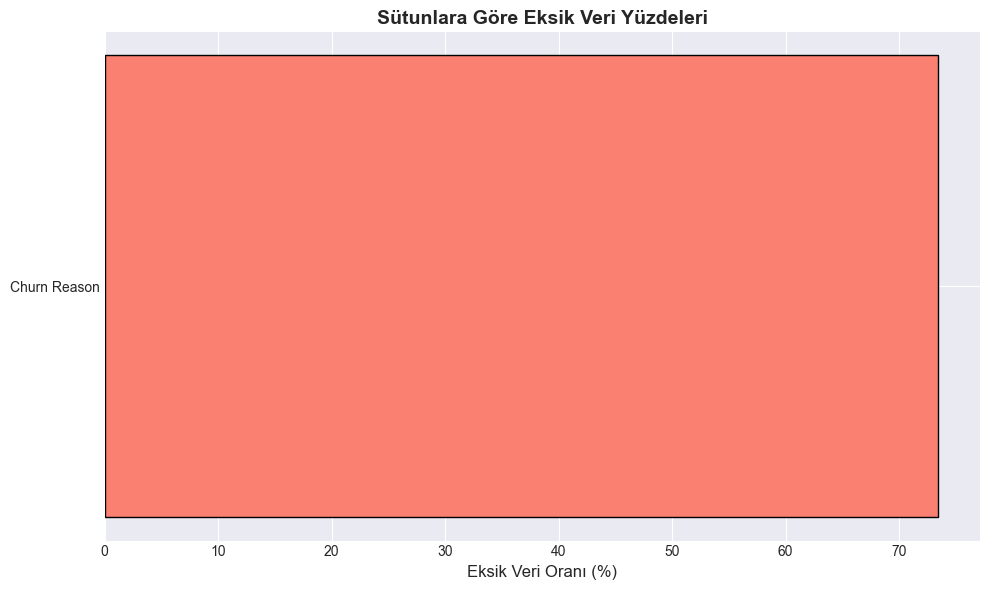

In [15]:
# ============================================
# 3. EKSİK VERİ ANALİZİ
# ============================================
print("\n[3/11] 🔎 Eksik veri kontrol ediliyor...")
print("\n" + "="*70)
print("EKSİK VERİ ANALİZİ")
print("="*70)

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Sütun': df.columns,
    'Eksik Sayı': missing_count.values,
    'Yüzde (%)': missing_percent.values
})

missing_df = missing_df[missing_df['Eksik Sayı'] > 0].sort_values('Eksik Sayı', ascending=False)

if len(missing_df) > 0:
    print("⚠️ Eksik veri tespit edildi:")
    display(missing_df)
    
    # Görselleştirme
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Sütun'], missing_df['Yüzde (%)'], color='salmon', edgecolor='black')
    plt.xlabel('Eksik Veri Oranı (%)', fontsize=12)
    plt.title('Sütunlara Göre Eksik Veri Yüzdeleri', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("✅ Eksik veri yok!")


In [16]:
# ============================================
# 4. İSTATİSTİKSEL ÖZET
# ============================================
print("\n[4/11] 📈 İstatistiksel özet hesaplanıyor...")
print("\n" + "="*70)
print("SAYISAL DEĞİŞKENLER İSTATİSTİKSEL ÖZET")
print("="*70)
display(df.describe())

print("\n" + "="*70)
print("KATEGORİK DEĞİŞKENLER ÖZET")
print("="*70)
display(df.describe(include='object'))


[4/11] 📈 İstatistiksel özet hesaplanıyor...

SAYISAL DEĞİŞKENLER İSTATİSTİKSEL ÖZET


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000



KATEGORİK DEĞİŞKENLER ÖZET


,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,2,4,6531,2,20
top,3186-AJIEK,United States,California,Los Angeles,"34.02381, -118.156582",Male,No,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3095,3473,2810,2785,3875,4171,2365,11,5174,192



[5/11] 🎯 Hedef değişken (Churn) analiz ediliyor...

✅ Churn sütunu bulundu: 'Churn Label'

CHURN DAĞILIMI
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Yüzdelik Dağılım:
  No: %73.46
  Yes: %26.54


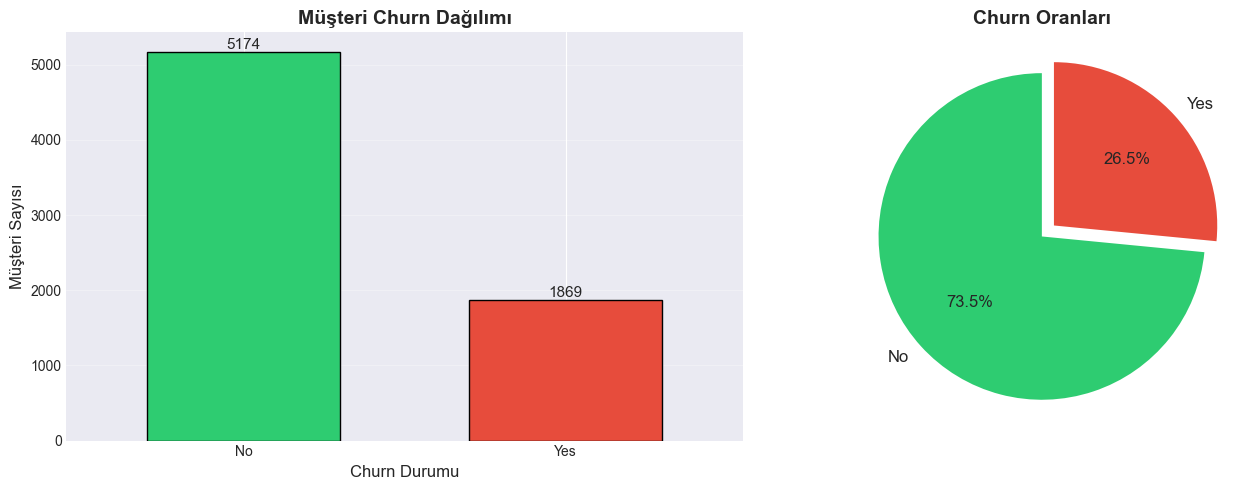

In [17]:
# ============================================
# 5. HEDEF DEĞİŞKEN (CHURN) ANALİZİ
# ============================================
print("\n[5/11] 🎯 Hedef değişken (Churn) analiz ediliyor...")

# Churn sütununu bul (farklı isimde olabilir)
churn_col = None
for col in df.columns:
    if 'churn' in col.lower():
        churn_col = col
        break

if churn_col:
    print(f"\n✅ Churn sütunu bulundu: '{churn_col}'")
    print("\n" + "="*70)
    print("CHURN DAĞILIMI")
    print("="*70)
    
    churn_counts = df[churn_col].value_counts()
    churn_percent = df[churn_col].value_counts(normalize=True) * 100
    
    print(churn_counts)
    print(f"\nYüzdelik Dağılım:")
    for value, pct in churn_percent.items():
        print(f"  {value}: %{pct:.2f}")
    
    # Görselleştirme
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar chart
    colors = ['#2ecc71', '#e74c3c'] if 'Yes' in churn_counts.index else ['#3498db', '#e74c3c']
    churn_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black', width=0.6)
    axes[0].set_title('Müşteri Churn Dağılımı', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Churn Durumu', fontsize=12)
    axes[0].set_ylabel('Müşteri Sayısı', fontsize=12)
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].grid(axis='y', alpha=0.3)
    
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d', fontsize=11)
    
    # Pie chart
    explode = [0, 0.1] if len(churn_counts) == 2 else None
    axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
                colors=colors, startangle=90, explode=explode, textprops={'fontsize': 12})
    axes[1].set_title('Churn Oranları', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Churn sütunu bulunamadı!")
    print("Mevcut sütunlar:", df.columns.tolist())

In [18]:
# ============================================
# 6. KATEGORİK DEĞİŞKEN ANALİZİ
# ============================================
print("\n[6/11] 📊 Kategorik değişkenler analiz ediliyor...")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# customerID gibi ID sütunlarını çıkar
categorical_cols = [col for col in categorical_cols 
                   if 'id' not in col.lower() and col != churn_col]

print(f"\n✅ {len(categorical_cols)} kategorik değişken bulundu:")
for i, col in enumerate(categorical_cols, 1):
    unique_count = df[col].nunique()
    print(f"{i:2d}. {col:25s} → {unique_count} benzersiz değer")

# İlk 5 kategorik değişkenin dağılımı
print("\n" + "="*70)
print("KATEGORİK DEĞİŞKENLERİN DAĞILIMI")
print("="*70)

for col in categorical_cols[:5]:
    print(f"\n📊 {col}:")
    value_counts = df[col].value_counts()
    display(value_counts)
    print(f"Eksik: {df[col].isnull().sum()}")

# Churn'e göre analiz
if churn_col and len(categorical_cols) > 0:
    print("\n" + "="*70)
    print("KATEGORİK DEĞİŞKENLERE GÖRE CHURN ORANLARI (%)")
    print("="*70)
    
    for col in categorical_cols[:6]:
        print(f"\n📊 {col}:")
        try:
            churn_by_category = pd.crosstab(df[col], df[churn_col], normalize='index') * 100
            display(churn_by_category.round(2))
        except:
            print(f"  ⚠️ Analiz yapılamadı")



[6/11] 📊 Kategorik değişkenler analiz ediliyor...

✅ 22 kategorik değişken bulundu:
 1. Country                   → 1 benzersiz değer
 2. State                     → 1 benzersiz değer
 3. City                      → 1129 benzersiz değer
 4. Lat Long                  → 1652 benzersiz değer
 5. Gender                    → 2 benzersiz değer
 6. Senior Citizen            → 2 benzersiz değer
 7. Partner                   → 2 benzersiz değer
 8. Dependents                → 2 benzersiz değer
 9. Phone Service             → 2 benzersiz değer
10. Multiple Lines            → 3 benzersiz değer
11. Internet Service          → 3 benzersiz değer
12. Online Security           → 3 benzersiz değer
13. Online Backup             → 3 benzersiz değer
14. Device Protection         → 3 benzersiz değer
15. Tech Support              → 3 benzersiz değer
16. Streaming TV              → 3 benzersiz değer
17. Streaming Movies          → 3 benzersiz değer
18. Contract                  → 3 benzersiz değer
19. Paper

Country
United States    7043
Name: count, dtype: int64

Eksik: 0

📊 State:


State
California    7043
Name: count, dtype: int64

Eksik: 0

📊 City:


City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Stonyford          4
Washington         4
Big Bar            4
Chester            4
Alta               4
Name: count, Length: 1129, dtype: int64

Eksik: 0

📊 Lat Long:


Lat Long
34.02381, -118.156582     5
34.066303, -118.435479    5
34.099869, -118.326843    5
34.089953, -118.294824    5
34.078821, -118.177576    5
                         ..
39.02741, -121.614982     4
40.677649, -122.29467     4
40.775272, -123.287414    4
40.243494, -121.154733    4
37.424342, -122.165641    4
Name: count, Length: 1652, dtype: int64

Eksik: 0

📊 Gender:


Gender
Male      3555
Female    3488
Name: count, dtype: int64

Eksik: 0

KATEGORİK DEĞİŞKENLERE GÖRE CHURN ORANLARI (%)

📊 Country:


Churn Label,No,Yes
Country,,
United States,73.46,26.54



📊 State:


Churn Label,No,Yes
State,,
California,73.46,26.54



📊 City:


Churn Label,No,Yes
City,,
Acampo,25.0,75.0
Acton,100.0,0.0
Adelanto,80.0,20.0
Adin,50.0,50.0
Agoura Hills,60.0,40.0
...,...,...
Yreka,100.0,0.0
Yuba City,75.0,25.0
Yucaipa,75.0,25.0



📊 Lat Long:


Churn Label,No,Yes
Lat Long,,
"32.555828, -117.040073",80.0,20.0
"32.578103, -117.012975",60.0,40.0
"32.579134, -117.119009",60.0,40.0
"32.587557, -116.636816",100.0,0.0
"32.605012, -116.97595",60.0,40.0
...,...,...
"41.924174, -123.260788",50.0,50.0
"41.932207, -120.135941",50.0,50.0
"41.949216, -122.050062",75.0,25.0



📊 Gender:


Churn Label,No,Yes
Gender,,
Female,73.08,26.92
Male,73.84,26.16



📊 Senior Citizen:


Churn Label,No,Yes
Senior Citizen,,
No,76.39,23.61
Yes,58.32,41.68


In [19]:
# ============================================
# 7. SAYISAL DEĞİŞKEN ANALİZİ
# ============================================
print("\n[7/11] 🔢 Sayısal değişkenler analiz ediliyor...")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n✅ {len(numerical_cols)} sayısal değişken bulundu:")
for i, col in enumerate(numerical_cols, 1):
    print(f"{i:2d}. {col}")

if churn_col:
    print("\n" + "="*70)
    print("CHURN'E GÖRE SAYISAL DEĞİŞKEN ORTALAMALARI")
    print("="*70)
    display(df.groupby(churn_col)[numerical_cols].mean())
    
    print("\n" + "="*70)
    print("CHURN'E GÖRE SAYISAL DEĞİŞKEN MEDYAN DEĞERLERİ")
    print("="*70)
    display(df.groupby(churn_col)[numerical_cols].median())



[7/11] 🔢 Sayısal değişkenler analiz ediliyor...

✅ 9 sayısal değişken bulundu:
 1. Count
 2. Zip Code
 3. Latitude
 4. Longitude
 5. Tenure Months
 6. Monthly Charges
 7. Churn Value
 8. Churn Score
 9. CLTV

CHURN'E GÖRE SAYISAL DEĞİŞKEN ORTALAMALARI


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
Churn Label,,,,,,,,,
No,1.0,93518.212215,36.287436,-119.804838,37.569965,61.265124,0.0,50.098183,4490.921337
Yes,1.0,93532.352595,36.268614,-119.782388,17.979133,74.441332,1.0,82.510433,4149.414660



CHURN'E GÖRE SAYISAL DEĞİŞKEN MEDYAN DEĞERLERİ


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
Churn Label,,,,,,,,,
No,1.0,93551.0,36.414414,-119.739935,38.0,64.425,0.0,50.0,4620.0
Yes,1.0,93554.0,36.298780,-119.711868,10.0,79.650,1.0,82.0,4238.0



[8/11] 🔗 Korelasyon analizi yapılıyor...

KORELASYON MATRİSİ


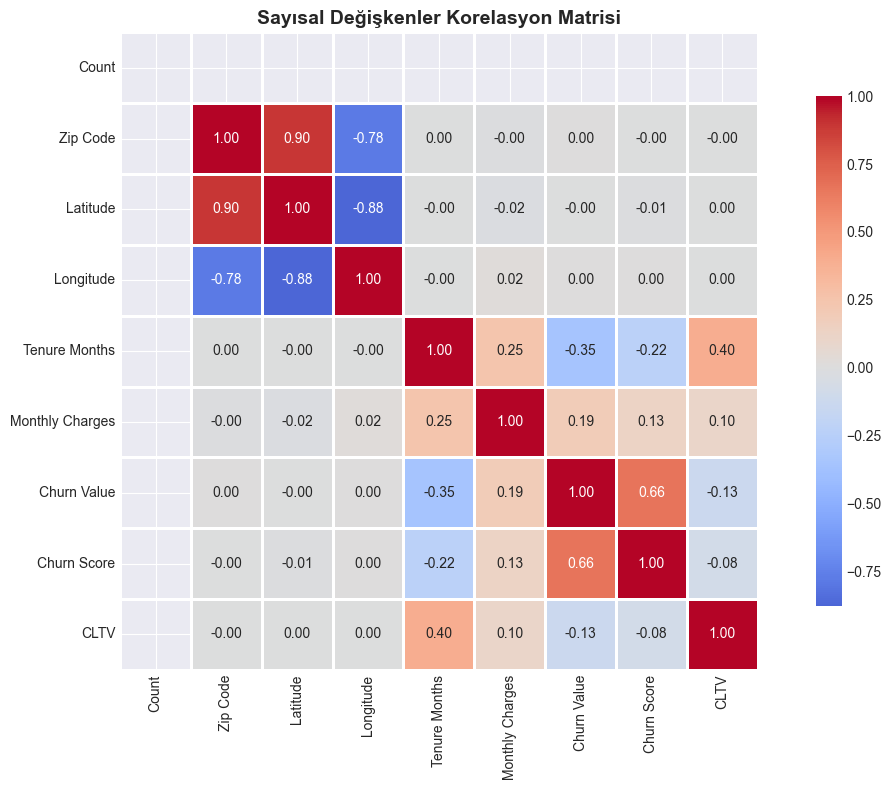


🔥 En Yüksek Korelasyonlar:


Zip Code       Latitude         0.895743
Latitude       Zip Code         0.895743
Longitude      Latitude         0.876779
Latitude       Longitude        0.876779
Zip Code       Longitude        0.784271
Longitude      Zip Code         0.784271
Churn Value    Churn Score      0.664897
Churn Score    Churn Value      0.664897
CLTV           Tenure Months    0.396406
Tenure Months  CLTV             0.396406
dtype: float64

In [20]:
# ============================================
# 8. KORELASYON ANALİZİ
# ============================================
print("\n[8/11] 🔗 Korelasyon analizi yapılıyor...")

if len(numerical_cols) > 1:
    print("\n" + "="*70)
    print("KORELASYON MATRİSİ")
    print("="*70)
    
    plt.figure(figsize=(12, 8))
    correlation = df[numerical_cols].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Sayısal Değişkenler Korelasyon Matrisi', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # En yüksek korelasyonlar
    print("\n🔥 En Yüksek Korelasyonlar:")
    corr_pairs = correlation.abs().unstack()
    corr_pairs = corr_pairs[corr_pairs < 1.0].sort_values(ascending=False)
    display(corr_pairs.head(10))


[9/11] 📉 Dağılım grafikleri oluşturuluyor...

SAYISAL DEĞİŞKENLERİN DAĞILIMI (CHURN'E GÖRE)


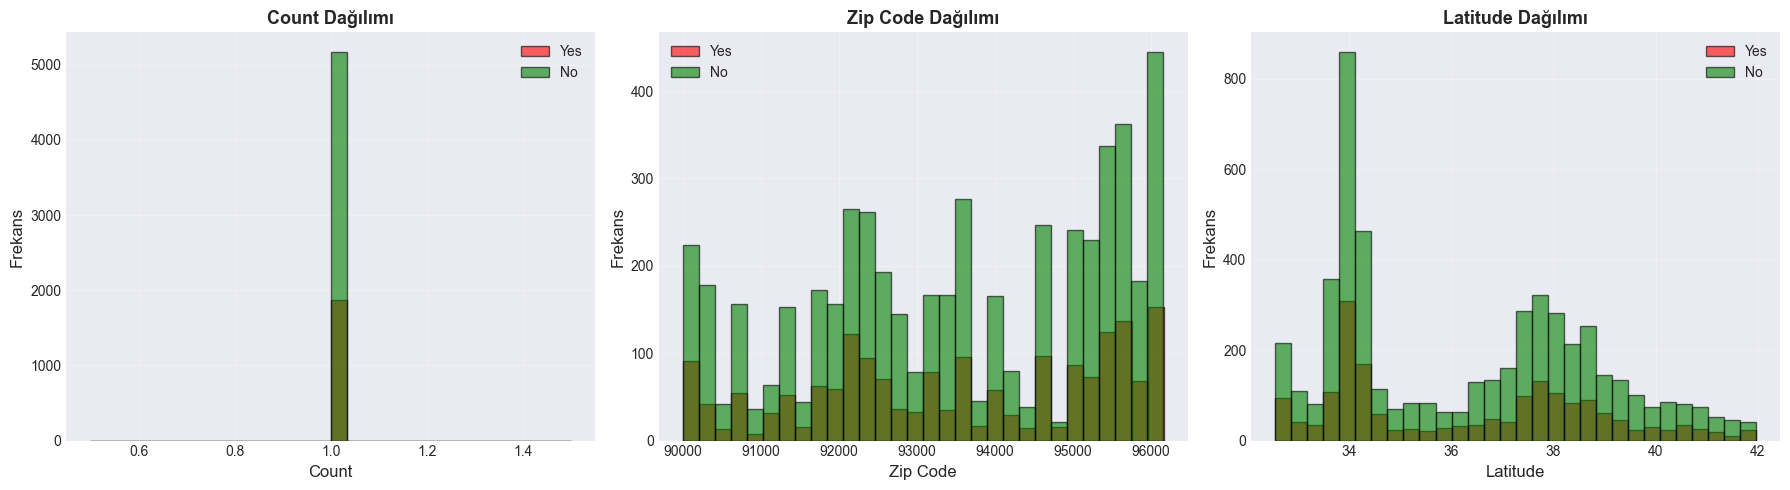

In [22]:
# ============================================
# 9. DAĞILIM GRAFİKLERİ
# ============================================
print("\n[9/11] 📉 Dağılım grafikleri oluşturuluyor...")

if churn_col and len(numerical_cols) >= 3:
    print("\n" + "="*70)
    print("SAYISAL DEĞİŞKENLERİN DAĞILIMI (CHURN'E GÖRE)")
    print("="*70)
    
    cols_to_plot = numerical_cols[:3]
    fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(6*len(cols_to_plot), 5))
    
    if len(cols_to_plot) == 1:
        axes = [axes]
    
    for idx, col in enumerate(cols_to_plot):
        for churn_value in df[churn_col].unique():
            data = df[df[churn_col] == churn_value][col].dropna()
            color = 'green' if str(churn_value).lower() in ['no', '0', 'false'] else 'red'
            label = f'{churn_value}'
            axes[idx].hist(data, bins=30, alpha=0.6, label=label, color=color, edgecolor='black')
        
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Frekans', fontsize=12)
        axes[idx].set_title(f'{col} Dağılımı', fontsize=13, fontweight='bold')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()



[10/11] 📦 Box plot analizi yapılıyor...

AYKIRI DEĞER ANALİZİ (BOX PLOT)


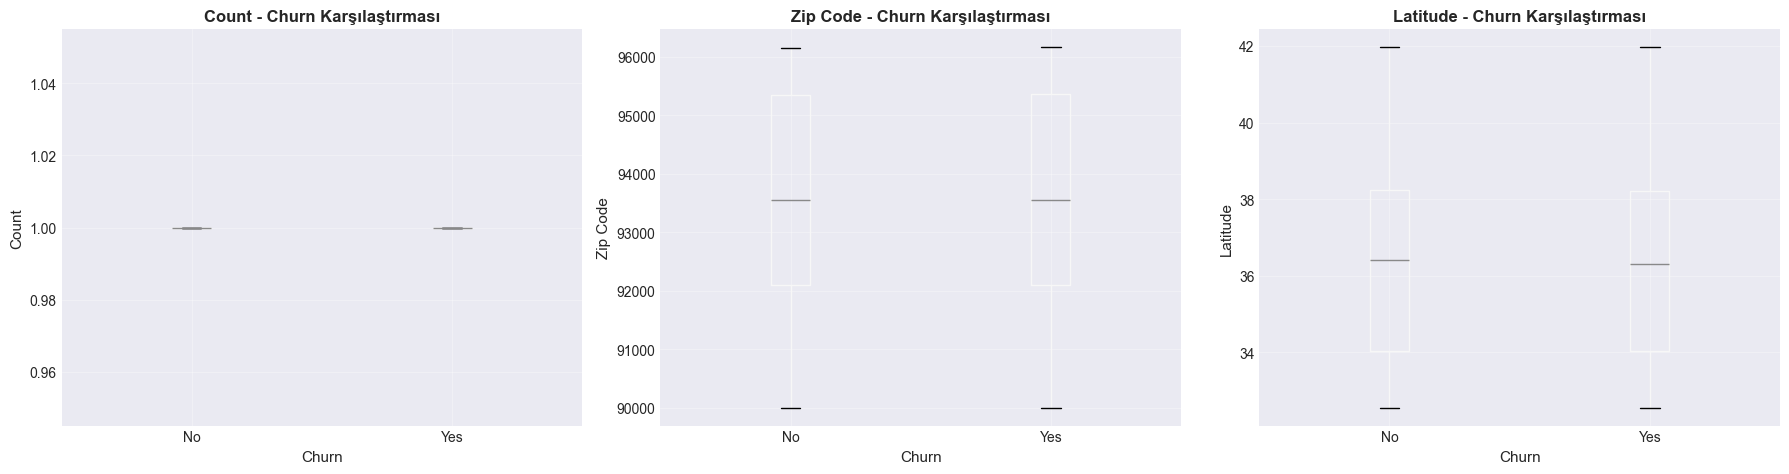

In [23]:
# ============================================
# 10. BOX PLOT (AYKIRI DEĞERLER)
# ============================================
print("\n[10/11] 📦 Box plot analizi yapılıyor...")

if churn_col and len(numerical_cols) > 0:
    print("\n" + "="*70)
    print("AYKIRI DEĞER ANALİZİ (BOX PLOT)")
    print("="*70)
    
    n_plots = min(3, len(numerical_cols))
    fig, axes = plt.subplots(1, n_plots, figsize=(6*n_plots, 5))
    
    if n_plots == 1:
        axes = [axes]
    
    for idx, col in enumerate(numerical_cols[:n_plots]):
        df.boxplot(column=col, by=churn_col, ax=axes[idx])
        axes[idx].set_title(f'{col} - Churn Karşılaştırması', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Churn', fontsize=11)
        axes[idx].set_ylabel(col, fontsize=11)
        axes[idx].grid(alpha=0.3)
    
    plt.suptitle('')
    plt.tight_layout()
    plt.show()



[11/11] 📊 Kategorik değişkenler görselleştiriliyor...

KATEGORİK DEĞİŞKENLERE GÖRE CHURN ORANLARI


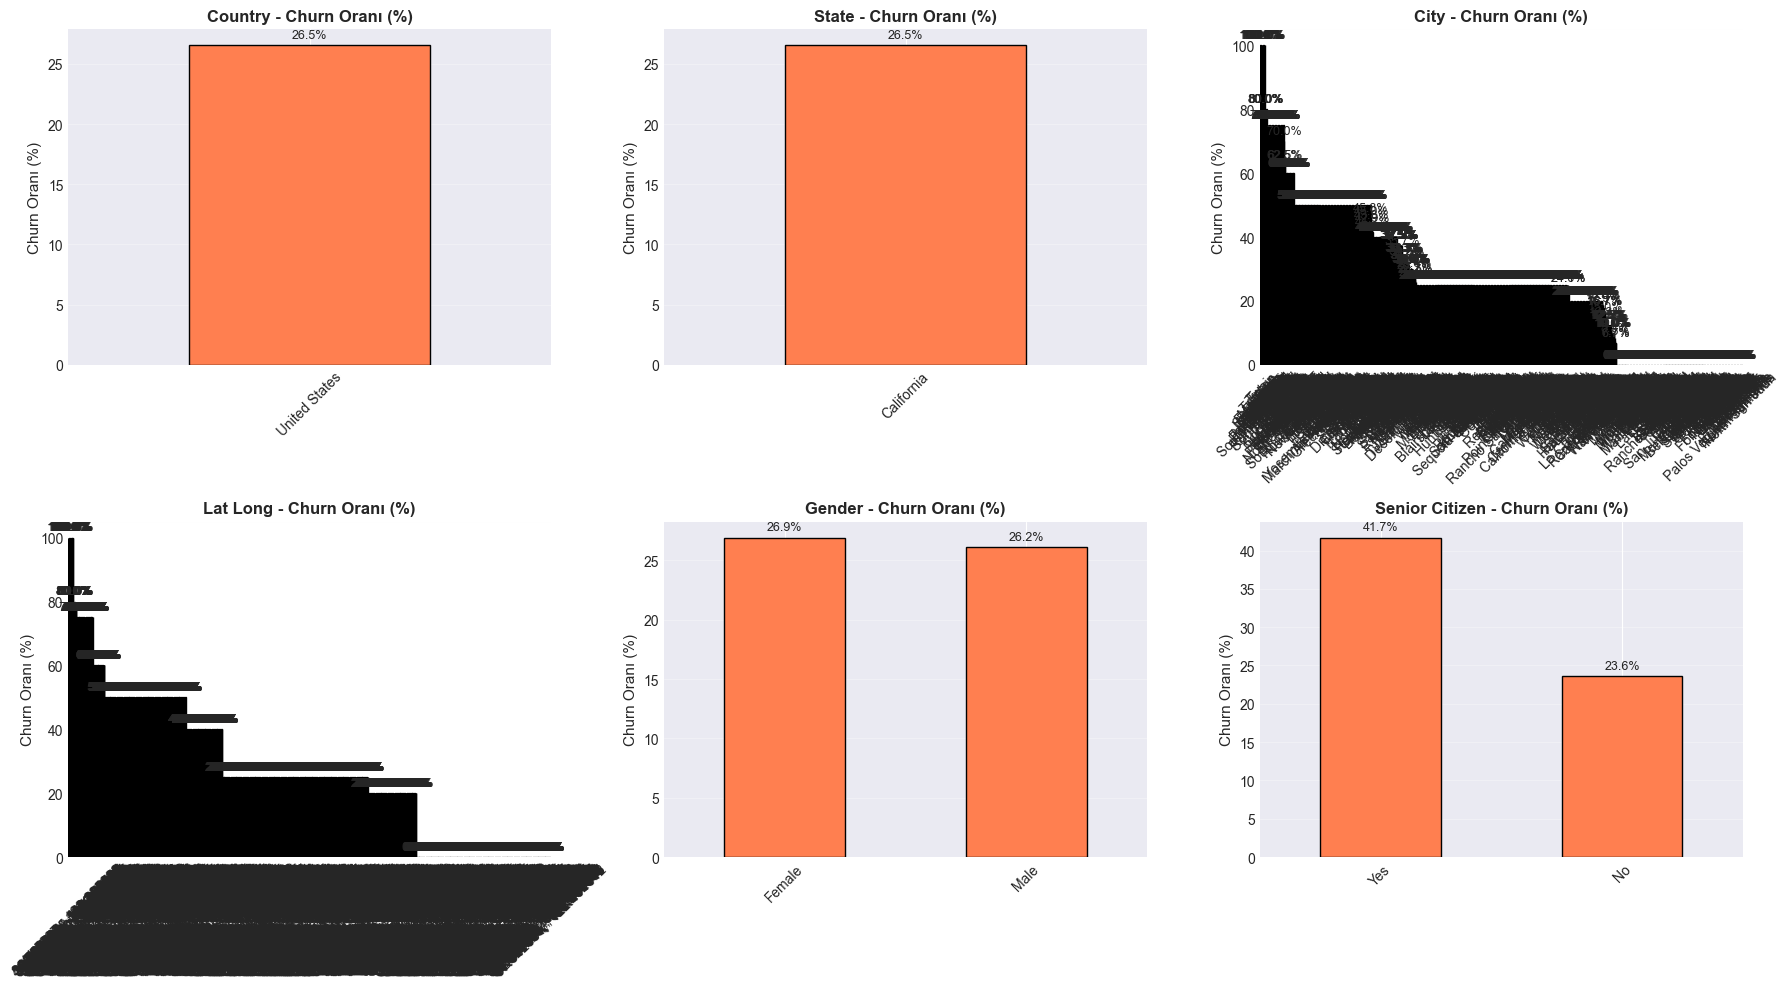

In [24]:
# ============================================
# 11. KATEGORİK DEĞİŞKENLER - CHURN ORANLARI GÖRSELLEŞTİRME
# ============================================
print("\n[11/11] 📊 Kategorik değişkenler görselleştiriliyor...")

if churn_col and len(categorical_cols) > 0:
    print("\n" + "="*70)
    print("KATEGORİK DEĞİŞKENLERE GÖRE CHURN ORANLARI")
    print("="*70)
    
    cols_to_plot = categorical_cols[:6]
    n_cols = 3
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    axes = axes.ravel() if n_rows > 1 else [axes] if len(cols_to_plot) == 1 else axes
    
    for idx, col in enumerate(cols_to_plot):
        try:
            # Churn oranını hesapla (Yes/1 oranı)
            churn_data = df.groupby(col)[churn_col].apply(
                lambda x: (x.astype(str).str.lower().isin(['yes', '1', 'true'])).sum() / len(x) * 100
            ).sort_values(ascending=False)
            
            churn_data.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
            axes[idx].set_title(f'{col} - Churn Oranı (%)', fontsize=12, fontweight='bold')
            axes[idx].set_ylabel('Churn Oranı (%)', fontsize=11)
            axes[idx].set_xlabel('', fontsize=11)
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(axis='y', alpha=0.3)
            
            for container in axes[idx].containers:
                axes[idx].bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'Analiz yapılamadı\n{col}', 
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].set_title(col, fontsize=12)
    
    # Kullanılmayan subplot'ları gizle
    for idx in range(len(cols_to_plot), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()


In [25]:
# ============================================
# ÖZET RAPOR
# ============================================
print("\n" + "="*70)
print("  🎉 EDA ANALİZİ TAMAMLANDI! 🎉  ")
print("="*70)

print("\n📋 ÖZET RAPOR:")
print(f"  • Toplam Müşteri Sayısı: {df.shape[0]:,}")
print(f"  • Toplam Özellik Sayısı: {df.shape[1]}")
print(f"  • Kategorik Değişken: {len(categorical_cols)}")
print(f"  • Sayısal Değişken: {len(numerical_cols)}")
print(f"  • Eksik Veri: {'Var' if len(missing_df) > 0 else 'Yok'}")

if churn_col:
    churn_rate = (df[churn_col].astype(str).str.lower().isin(['yes', '1', 'true']).sum() / len(df)) * 100
    print(f"  • Churn Oranı: %{churn_rate:.2f}")

print("\n✅ Sıradaki Adım: Veri Ön İşleme ve Feature Engineering")
print("="*70)


  🎉 EDA ANALİZİ TAMAMLANDI! 🎉  

📋 ÖZET RAPOR:
  • Toplam Müşteri Sayısı: 7,043
  • Toplam Özellik Sayısı: 33
  • Kategorik Değişken: 22
  • Sayısal Değişken: 9
  • Eksik Veri: Var
  • Churn Oranı: %26.54

✅ Sıradaki Adım: Veri Ön İşleme ve Feature Engineering
